##### Try PCA with any classifier model. 
##### Check the performance of classifier with and without PCA. [You are free to choose dataset and classifier of your choice]
Here I have taken SVM classifier with and without PCA. 

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn import decomposition

In [2]:
# Load Fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
# Mapping class labels with class_names
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle"]

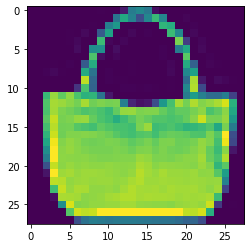

In [4]:
# Plot Sample Image
plt.imshow(X_train[100])

In [5]:
# Get class label for above image
print("Label for above image is : ",class_names[y_train[100]])

Label for above image is :  Bag


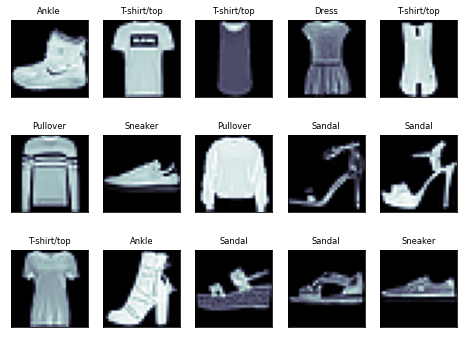

In [6]:
# Plot some images
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.bone)
    ax.set_title(class_names[y_train[i]], fontsize='small', color='black')

In [7]:
# Get imagesize
print("Image size is : " , X_train[1].shape)

Image size is :  (28, 28)


In [8]:
# Prepare dataset for training
X_train, X_test = np.array(X_train, np.float32), np.array(X_test,np.float32)
num_features = 28*28
X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])
X_train, X_test = X_train/255, X_test/255

Performance of classifier with PCA

In [9]:
# Take PCA with only 300 features out of 784
pca = decomposition.PCA(n_components=400,whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [10]:
# PCA component shape
print(pca.components_.shape)

(400, 784)


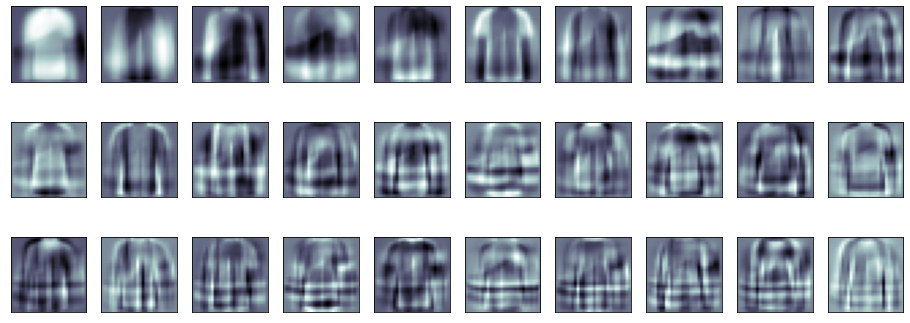

In [11]:
# Plot mean images
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(28,28),cmap=plt.cm.bone)

In [12]:
# Set X_train_pca and X_test_pca according to pca
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
# Get final reduction shape
print("X_train PCA shape : ",X_train_pca.shape)
print("X_test PCA shape : ",X_test_pca.shape)

X_train PCA shape :  (60000, 400)
X_test PCA shape :  (10000, 400)


In [14]:
# Define classifier
clf = svm.SVC(C=5., gamma=0.001,kernel='rbf')
clf.fit(X_train_pca, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

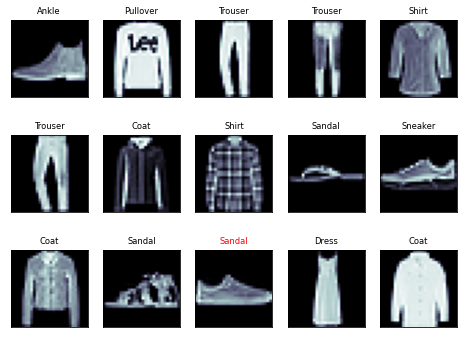

In [15]:
# Plot some test images with predicted labels
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(class_names[y_pred], fontsize='small', color=color)

In [16]:
# Predict X_test_pca and generate reports
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.83      0.82      1000
           5       0.96      0.97      0.96      1000
           6       0.73      0.66      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.97      0.97      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
# Print accuracy
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8899


Performance of classifier without PCA

In [18]:
# Define classifier without PCA
clf = svm.SVC(C=5., gamma=0.001,kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# Predict X_test_pca and generate reports
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.78      0.77      1000
           3       0.85      0.88      0.87      1000
           4       0.77      0.79      0.78      1000
           5       0.95      0.93      0.94      1000
           6       0.68      0.59      0.63      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [20]:
# Print accuracy
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8616


**Note :** SVM classifier with PCA perfoms model with accuracy 0.8899 and without PCA perfoms with accuracy 0.8616. Hence, For long range of feature set PCA might be helpful.   